In [1]:
import xarray as xr
import xesmf as xe
from cmip6_preprocessing.preprocessing import combined_preprocessing
import PyCO2SYS as pyco2 # i have to install this package through terminal for it to work
import intake
import matplotlib.pyplot as plt
import numpy as np
import warnings
import gsw
from cmip6_preprocessing.postprocessing import combine_datasets
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import cmocean
import matplotlib.path as mpath
from cmip6_preprocessing.postprocessing import combine_datasets
from cmip6_preprocessing.postprocessing import merge_variables
from dask.diagnostics import ProgressBar

In [ ]:
conversion =  1e6/1035
results = pyco2.sys(par1=ds['talk'].talk*conversion,par2=ds['dissic'].dissic*conversion,par1_type=1,par2_type=2,
                        pressure_out=0, temperature_out = ds['thetao'].thetao, pressure = ds['p'].talk, 
                        temperature = ds['insitutemp'])

<ipython-input-45-43d58cdb3b55>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(ds['dissic'].y,ds['dissic'].lev,results['pCO2_out'], vmin = 0, vmax = 1000)


Text(0.5, 1.0, 'UKESM1-0-LL.gn.historical.Omon')

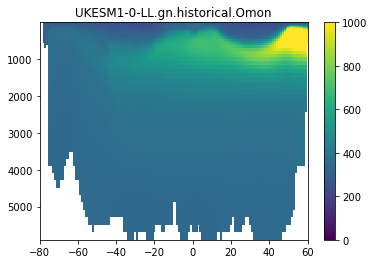

In [45]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=[6,4])
im = ax.pcolormesh(ds['dissic'].y,ds['dissic'].lev,results['pCO2_out'], vmin = 0, vmax = 1000)

ax.set_xlim([-80,60])
ax.invert_yaxis()
cbar = plt.colorbar(im,ax=ax)
ax.set_title('UKESM1-0-LL.gn.historical.Omon')


In [2]:
dd= {}

In [58]:
# dd = {}
dd['UKESM1-0-LL.gn.historical.Omon'] = {}
ds = dd['UKESM1-0-LL.gn.historical.Omon']
ds['dissic']= xr.open_dataset('UKESM1_dissic_20yr.nc')
ds['talk']= xr.open_dataset('UKESM1_talk_20yr.nc')
ds['thetao']= xr.open_dataset('UKESM1_thetao_20yr.nc')
# .isel(x=slice(180,200)).mean('x', keep_attrs=True)
ds['so']= xr.open_dataset('UKESM1_so_20yr.nc')
# ds['p'] = gsw.p_from_z(-1*ds['dissic'].lev, ds['dissic'].y, geo_strf_dyn_height=0, sea_surface_geopotential=0)*xr.ones_like(ds['talk']) # expand along time dimension
# ds['insitutemp'] = gsw.t_from_CT(ds['so'].so, ds['thetao'].thetao, ds['p'].talk)
ds['fgco2']= xr.open_dataset('UKESM1_fgco2_20yr.nc')

In [17]:
ds = dd['UKESM1-0-LL.gn.historical.Omon']
conversion =  1e6/1035
results = pyco2.sys(par1=ds['talk'].talk*conversion,par2=ds['dissic'].dissic*conversion,par1_type=1,par2_type=2,
                        pressure_out=0, temperature_out = ds['thetao'].thetao, pressure = ds['p'].talk, 
                        temperature = ds['insitutemp'])

In [20]:
dd['CanESM5-CanOE.gn.historical.Omon'] = {}
dd['CanESM5-CanOE.gn.historical.Omon']['dissic']= xr.open_dataset('CanESM5CanOE_dissic_20yr.nc')
dd['CanESM5-CanOE.gn.historical.Omon']['talk']= xr.open_dataset('CanESM5CanOE_talk_20yr.nc')
dd['CanESM5-CanOE.gn.historical.Omon']['thetao']= xr.open_dataset('CanESM5CanOE_thetao_20yr.nc')
dd['CanESM5-CanOE.gn.historical.Omon']['so']= xr.open_dataset('CanESM5CanOE_so_20yr.nc')
# dd['CanESM5-CanOE.gn.historical.Omon']['p'] = gsw.p_from_z(-1*dd['CanESM5-CanOE.gn.historical.Omon']['dissic'].lev, dd['CanESM5-CanOE.gn.historical.Omon']['dissic'].y, geo_strf_dyn_height=0, sea_surface_geopotential=0)*xr.ones_like(dd['CanESM5-CanOE.gn.historical.Omon']['talk']) # expand along time dimension
# dd['CanESM5-CanOE.gn.historical.Omon']['insitutemp'] = gsw.t_from_CT(dd['CanESM5-CanOE.gn.historical.Omon']['so'].so, dd['CanESM5-CanOE.gn.historical.Omon']['thetao'].thetao, dd['CanESM5-CanOE.gn.historical.Omon']['p'].talk)
dd['CanESM5-CanOE.gn.historical.Omon']['fgco2']= xr.open_dataset('CanESM5CanOE_fgco2_20yr.nc')

In [21]:
dd['CNRM-ESM2-1.gn.historical.Omon'] = {}
ds = dd['CNRM-ESM2-1.gn.historical.Omon']
ds['dissic']= xr.open_dataset('CNRM_dissic_20yr.nc')
ds['talk']= xr.open_dataset('CNRM_talk_20yr.nc')
ds['thetao']= xr.open_dataset('CNRM_thetao_20yr.nc')
ds['so']= xr.open_dataset('CNRM_so_20yr.nc')
# ds['p'] = gsw.p_from_z(-1*ds['dissic'].lev, ds['dissic'].y, geo_strf_dyn_height=0, sea_surface_geopotential=0)*xr.ones_like(ds['talk']) # expand along time dimension
# ds['insitutemp'] = gsw.t_from_CT(ds['so'].so, ds['thetao'].thetao, ds['p'].talk)
ds['fgco2']= xr.open_dataset('CNRM_fgco2_20yr.nc')

In [22]:
dd['CanESM5.gn.historical.Omon'] = {}
ds = dd['CanESM5.gn.historical.Omon']
ds['dissic']= xr.open_dataset('CanESM5_dissic_20yr.nc')
ds['talk']= xr.open_dataset('CanESM5_talk_20yr.nc')
ds['thetao']= xr.open_dataset('CanESM5_thetao_20yr.nc')
ds['so']= xr.open_dataset('CanESM5_so_20yr.nc')
# ds['p'] = gsw.p_from_z(-1*ds['dissic'].lev, ds['dissic'].y, geo_strf_dyn_height=0, sea_surface_geopotential=0)*xr.ones_like(ds['talk']) # expand along time dimension
# ds['insitutemp'] = gsw.t_from_CT(ds['so'].so, ds['thetao'].thetao, ds['p'].talk)
ds['fgco2']= xr.open_dataset('CanESM5_fgco2_20yr.nc')


In [23]:
dd['IPSL-CM6A-LR.gn.historical.Omon'] = {}
ds = dd['IPSL-CM6A-LR.gn.historical.Omon']
ds['dissic']= xr.open_dataset('IPSL_dissic_20yr.nc')
ds['talk']= xr.open_dataset('IPSL_talk_20yr.nc')
ds['thetao']= xr.open_dataset('IPSL_thetao_20yr.nc')
ds['so']= xr.open_dataset('IPSL_so_20yr.nc')
# ds['p'] = gsw.p_from_z(-1*ds['dissic'].lev, ds['dissic'].y, geo_strf_dyn_height=0, sea_surface_geopotential=0)*xr.ones_like(ds['talk']) # expand along time dimension
# ds['insitutemp'] = gsw.t_from_CT(ds['so'].so, ds['thetao'].thetao, ds['p'].talk)
ds['fgco2']= xr.open_dataset('IPSL_fgco2_20yr.nc')


In [24]:
dd['CESM2-WACCM.gr.historical.Omon'] = {}
ds = dd['CESM2-WACCM.gr.historical.Omon']
ds['dissic']= xr.open_dataset('CESM2-WACCM_dissic_20yr.nc')
ds['talk']= xr.open_dataset('CESM2-WACCM_talk_20yr.nc')
ds['thetao']= xr.open_dataset('CESM2-WACCM_thetao_20yr.nc')
ds['so']= xr.open_dataset('CESM2-WACCM_so_20yr.nc')
# ds['p'] = gsw.p_from_z(-1*ds['dissic'].lev, ds['dissic'].y, geo_strf_dyn_height=0, sea_surface_geopotential=0)*xr.ones_like(ds['talk']) # expand along time dimension
# ds['insitutemp'] = gsw.t_from_CT(ds['so'].so, ds['thetao'].thetao, ds['p'].talk)
ds['fgco2']= xr.open_dataset('CESM2-WACCM_fgco2_20yr.nc')


In [25]:
# 'CESM2.gr.historical.Omon'
dd['CESM2.gr.historical.Omon'] = {}
ds = dd['CESM2.gr.historical.Omon']
ds['dissic']= xr.open_dataset('CESM2_dissic_20yr.nc')
ds['talk']= xr.open_dataset('CESM2_talk_20yr.nc')
ds['thetao']= xr.open_dataset('CESM2_thetao_20yr.nc')
ds['so']= xr.open_dataset('CESM2_so_20yr.nc')
# ds['p'] = gsw.p_from_z(-1*ds['dissic'].lev, ds['dissic'].y, geo_strf_dyn_height=0, sea_surface_geopotential=0)*xr.ones_like(ds['talk']) # expand along time dimension
# ds['insitutemp'] = gsw.t_from_CT(ds['so'].so, ds['thetao'].thetao, ds['p'].talk)
ds['fgco2']= xr.open_dataset('CESM2_fgco2_20yr.nc')


In [26]:
# 'CESM2-WACCM-FV2.gr.historical.Omon'
dd['CESM2-WACCM-FV2.gr.historical.Omon'] = {}
ds = dd['CESM2-WACCM-FV2.gr.historical.Omon']
ds['dissic']= xr.open_dataset('CESM2-WACCM-FV2_dissic_20yr.nc')
ds['talk']= xr.open_dataset('CESM2-WACCM-FV2_talk_20yr.nc')
ds['thetao']= xr.open_dataset('CESM2-WACCM-FV2_thetao_20yr.nc')
ds['so']= xr.open_dataset('CESM2-WACCM-FV2_so_20yr.nc')
# ds['p'] = gsw.p_from_z(-1*ds['dissic'].lev, ds['dissic'].y, geo_strf_dyn_height=0, sea_surface_geopotential=0)*xr.ones_like(ds['talk']) # expand along time dimension
# ds['insitutemp'] = gsw.t_from_CT(ds['so'].so, ds['thetao'].thetao, ds['p'].talk)
ds['fgco2']= xr.open_dataset('CESM2-WACCM-FV2_fgco2_20yr.nc')


In [27]:
# 'GFDL-ESM4.gr.historical.Omon'
dd['GFDL-ESM4.gr.historical.Omon'] = {}
ds = dd['GFDL-ESM4.gr.historical.Omon']
ds['dissic']= xr.open_dataset('GFDL-ESM4_dissic_20yr.nc')
ds['talk']= xr.open_dataset('GFDL-ESM4_talk_20yr.nc')
ds['thetao']= xr.open_dataset('GFDL-ESM4_thetao_20yr.nc')
ds['so']= xr.open_dataset('GFDL-ESM4_so_20yr.nc')
# ds['p'] = gsw.p_from_z(-1*ds['dissic'].lev, ds['dissic'].y, geo_strf_dyn_height=0, sea_surface_geopotential=0)*xr.ones_like(ds['talk']) # expand along time dimension
# ds['insitutemp'] = gsw.t_from_CT(ds['so'].so, ds['thetao'].thetao, ds['p'].talk)
ds['fgco2']= xr.open_dataset('GFDL-ESM4_fgco2_20yr.nc')


In [28]:
# 'CESM2-FV2.gr.historical.Omon'
dd['CESM2-FV2.gr.historical.Omon'] = {}
ds = dd['CESM2-FV2.gr.historical.Omon']
ds['dissic']= xr.open_dataset('CESM2-FV2_dissic_20yr.nc')
ds['talk']= xr.open_dataset('CESM2-FV2_talk_20yr.nc')
ds['thetao']= xr.open_dataset('CESM2-FV2_thetao_20yr.nc')
ds['so']= xr.open_dataset('CESM2-FV2_so_20yr.nc')
# ds['p'] = gsw.p_from_z(-1*ds['dissic'].lev, ds['dissic'].y, geo_strf_dyn_height=0, sea_surface_geopotential=0)*xr.ones_like(ds['talk']) # expand along time dimension
# ds['insitutemp'] = gsw.t_from_CT(ds['so'].so, ds['thetao'].thetao, ds['p'].talk)
ds['fgco2']= xr.open_dataset('CESM2-FV2_fgco2_20yr.nc')


In [29]:
# 'GFDL-CM4.gr.historical.Omon'
dd['GFDL-CM4.gr.historical.Omon'] = {}
ds = dd['GFDL-CM4.gr.historical.Omon']
ds['dissic']= xr.open_dataset('GFDL-CM4_dissic_20yr.nc')
ds['talk']= xr.open_dataset('GFDL-CM4_talk_20yr.nc')
ds['thetao']= xr.open_dataset('GFDL-CM4_thetao_20yr.nc')
ds['so']= xr.open_dataset('GFDL-CM4_so_20yr.nc')
# ds['p'] = gsw.p_from_z(-1*ds['dissic'].lev, ds['dissic'].y, geo_strf_dyn_height=0, sea_surface_geopotential=0)*xr.ones_like(ds['talk']) # expand along time dimension
# ds['insitutemp'] = gsw.t_from_CT(ds['so'].so, ds['thetao'].thetao, ds['p'].talk)
ds['fgco2']= xr.open_dataset('GFDL-CM4_fgco2_20yr.nc')


In [30]:
# 'MRI-ESM2-0.gr.historical.Omon'
dd['MRI-ESM2-0.gr.historical.Omon'] = {}
ds = dd['MRI-ESM2-0.gr.historical.Omon']
ds['dissic']= xr.open_dataset('MRI-ESM2-0_dissic_20yr.nc')
ds['talk']= xr.open_dataset('MRI-ESM2-0_talk_20yr.nc')
ds['thetao']= xr.open_dataset('MRI-ESM2-0_thetao_20yr.nc')
ds['so']= xr.open_dataset('MRI-ESM2-0_so_20yr.nc')
# ds['p'] = gsw.p_from_z(-1*ds['dissic'].lev, ds['dissic'].y, geo_strf_dyn_height=0, sea_surface_geopotential=0)*xr.ones_like(ds['talk']) # expand along time dimension
# ds['insitutemp'] = gsw.t_from_CT(ds['so'].so, ds['thetao'].thetao, ds['p'].talk)
ds['fgco2']= xr.open_dataset('MRI-ESM2-0_fgco2_20yr.nc')

<ipython-input-36-0283e9df85f8>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(ds['dissic'].y,ds['dissic'].lev,results['pCO2_out'], vmin = 300, vmax = 650)


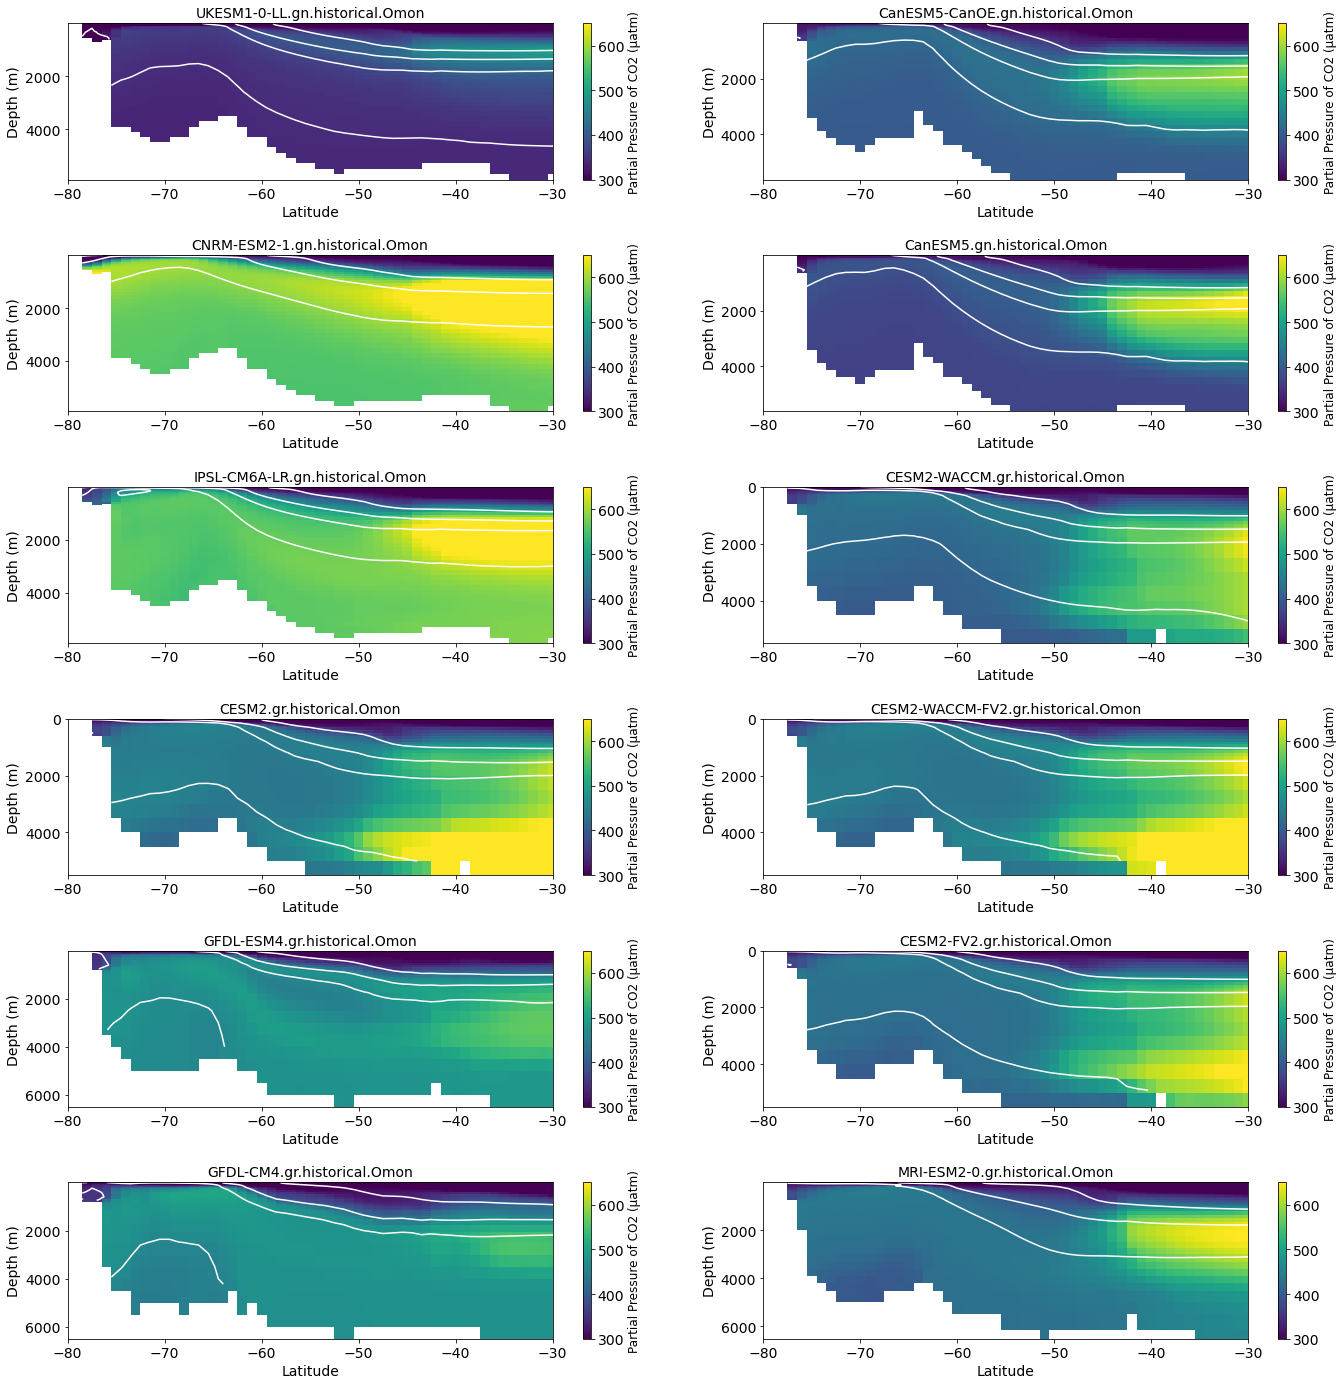

In [36]:
fig_pco2, axarr_pco2 = plt.subplots(nrows = 6, ncols = 2, figsize=[20,20])
fig_pco2.tight_layout(pad = 3.5)
plt.rc('font', size = 14)
plt.rc('axes', titlesize= 14)    
plt.rc('axes', labelsize= 12)
plt.rc('figure', titlesize=16)


#loop over each key, value pair of the dictionary
ax_idx = 0 # index for your axes array
for name, ds in dd.items():
    ax = axarr_pco2.flat[ax_idx]
    conversion =  1e6/1035
    results = pyco2.sys(par1=ds['talk'].talk*conversion,par2=ds['dissic'].dissic*conversion,par1_type=1,par2_type=2,
                        pressure_out=0, temperature_out = ds['thetao'].thetao, pressure = ds['p'].talk, 
                        temperature = ds['insitutemp'])
    ax.set_xlim([-80,-30])
    im = ax.pcolormesh(ds['dissic'].y,ds['dissic'].lev,results['pCO2_out'], vmin = 300, vmax = 650)
    sigma2 = gsw.sigma2(ds['so'].so,ds['thetao'].thetao)
    CS = ax.contour(ds['dissic'].y,ds['dissic'].lev,sigma2,levels=[36, 36.5, 36.75, 37], colors = 'w')
#     ax.clabel(CS, inline=1, fontsize=12, manual = False)
    ax.invert_yaxis()
    cbar.set_label('Partial Pressure of CO2 (\u03BCatm)')
    cbar = plt.colorbar(im,ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Depth (m)')
    ax_idx += 1 # thi


In [15]:
PCO2 = {}
for name, ds in dd.items():
    conversion =  1e6/1035
    results = pyco2.sys(par1=ds['talk'].talk*conversion,par2=ds['dissic'].dissic*conversion,par1_type=1,par2_type=2,
                        pressure_out=0, temperature_out = ds['thetao'].thetao, pressure = ds['p'].talk, 
                        temperature = ds['insitutemp'])
    PCO2[name] = results['pCO2_out']

# FgCO2

In [36]:
# using this to get lat and lon
col = intake.open_esm_datastore("https://storage.googleapis.com/cmip6/pangeo-cmip6.json")

def pick_first_member(ds_list, **kwargs):
    return ds_list[0]

variables = ['fgco2']
z_kwargs = {'consolidated': True, 'use_cftime': True}
query = dict(experiment_id=['historical'], 
             table_id=['Omon'], 
             variable_id=variables,
             grid_label=['gr'],
              source_id=['GFDL-ESM4']
#                          , 'CESM2-WACCM', 'CESM2', 
#                          'CESM2-FV2', 'MRI-ESM2-0', 
#                          'GFDL-CM4', 'CESM2-WACCM-FV2']
            )


cat = col.search(**query)

# print(cat.df['source_id'].unique())
dd_gr = cat.to_dataset_dict(zarr_kwargs=z_kwargs, storage_options={'token': 'anon'},
                                preprocess=combined_preprocessing, aggregate=False)

dd_gr = merge_variables(dd_gr)

temp={}
for name,item in dd_gr.items():
    #print(name)
    #print(item.data_vars)
    present = item.data_vars
    if all(i in present for i in variables):
        #print(name)
        temp[name]=item
dd_gr = temp
# list(dd_new_gr.keys())

dd_gr = combine_datasets(
    dd_gr,
    pick_first_member,
    match_attrs=['source_id', 'grid_label', 'experiment_id', 'table_id']
)
list(dd_gr.keys())
# dd_new_new_gr


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


['GFDL-ESM4.gr.historical.Omon']

In [37]:
dd_gr['GFDL-ESM4.gr.historical.Omon']

<xarray.Dataset>
Dimensions:        (bnds: 2, time: 1980, vertex: 4, x: 360, y: 180)
Coordinates:
  * y              (y) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * x              (x) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time           (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    lat_bounds     (y, bnds, x) float64 dask.array<chunksize=(180, 2, 360), meta=np.ndarray>
    lon_bounds     (x, bnds, y) float64 dask.array<chunksize=(360, 2, 180), meta=np.ndarray>
    time_bounds    (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
    lon            (x, y) float64 0.5 0.5 0.5 0.5 ... 359.5 359.5 359.5 359.5
    lat            (x, y) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
    lon_verticies  (vertex, x, y) float64 dask.array<chunksize=(1, 360, 180), meta=np.ndarray>
    lat_verticies  (vertex, x, y) float64 dask.array<chunksize=(1, 360, 180), meta=np.ndarray>
Dimensions without coordinates: bnds, vertex
Data variables:
    fgco2          (time, y, x) float32 dask.array<chunksize=(120, 180, 360), meta=np.ndarray>
Attributes: (12/51)
    Conventions:             CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:             CMIP
    branch_method:           standard
    branch_time_in_child:    0.0
    branch_time_in_parent:   36500.0
    comment:                 <null ref>
    ...                      ...
    variant_label:           r1i1p1f1
    status:                  2019-09-10;created;by nhn2@columbia.edu
    netcdf_tracking_ids:     hdl:21.14100/743485ef-f218-458b-ab73-36c4aeb883f...
    version_id:              v20190726
    intake_esm_varname:      None
    intake_esm_dataset_key:  CMIP.NOAA-GFDL.GFDL-ESM4.historical.r1i1p1f1.Omo...

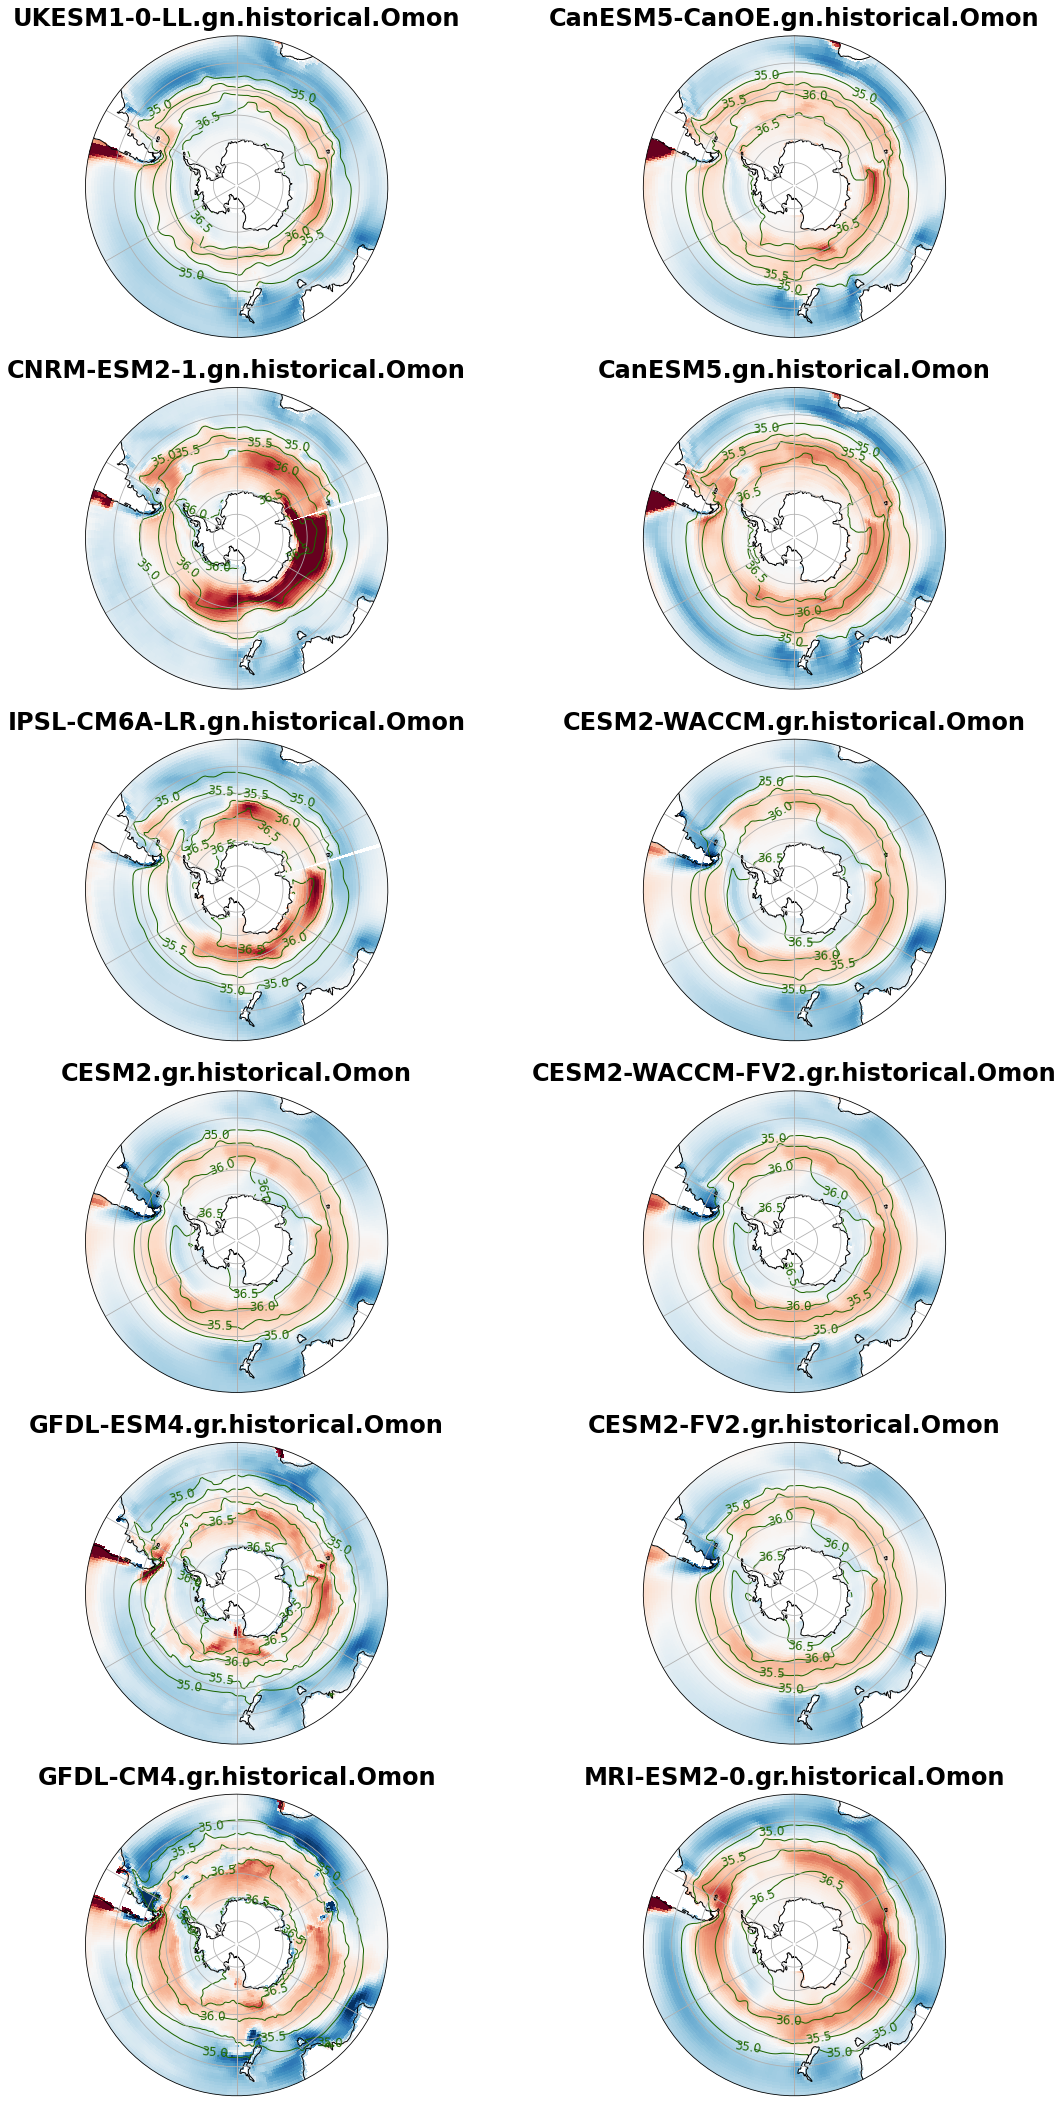

In [80]:
fig, axarr = plt.subplots(nrows = 6, ncols=2, figsize=[20,30], subplot_kw={'projection':ccrs.SouthPolarStereo()})
fig.tight_layout(pad = 5)
crs_plot = ccrs.SouthPolarStereo()
crs_source = ccrs.PlateCarree()

ax_idx = 0 # index for your axes array
for name, ds in dd.items():

    ax = axarr.flat[ax_idx]
    #fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':crs_plot})
#     ax.add_feature(cfeature.LAND,zorder=10,facecolor='darkgray')
    ax.set_extent([-180, 180, -90, -30], crs_source)
    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)
    
    ax.gridlines()
    ax.coastlines()
    
    title=name
    ax.set_title(title,fontsize=24,pad = 10, fontweight = 'bold')
    
    lat = ds['fgco2'].fgco2.lat.transpose('y','x')
    lon = ds['fgco2'].fgco2.lon.transpose('y','x')
    X = lon
    Y = lat
    
    conversion = 3.1536e7 * 22.72
    # 3.1536e7 seconds per year
    # 22.72 mol CO2 per kg -- 44.01 gCO2/mol
    Z = ds['fgco2'].fgco2*conversion
    rho = gsw.sigma2(ds['so'].so.isel(lev = 0),ds['thetao'].thetao.isel(lev = 0))
    rho = rho.transpose('x','y')
#     rho.assign_coords({'lat': Y})
#     rho.assign_coords({'lon': X})
#     rho = rho.transpose('x','y')
#     rho.assign_coords({'lat': Y})
#     rho.assign_coords({'lon': X})
# #     rho = rho.transpose('y','x')
# #     print(Z)
# #     print(rho)
    
    
    im = ax.pcolormesh(X,Y,-1*Z,cmap='RdBu_r', transform = crs_source, shading = 'auto', vmin = -1, vmax = 1)
    if name == 'UKESM1-0-LL.gn.historical.Omon' or name =='CanESM5-CanOE.gn.historical.Omon' or name =='CNRM-ESM2-1.gn.historical.Omon' or name == 'CanESM5.gn.historical.Omon' or name == 'IPSL-CM6A-LR.gn.historical.Omon':
        CS = ax.contour(rho.lon,rho.lat,rho,transform=crs_source,levels=[35, 35.5, 36, 36.5],colors='#1d6500', linewidths = 1)
    else:
        CS = ax.contour(rho.lon.transpose('y','x'),rho.lat.transpose('y','x'),rho.transpose('y','x'),transform=crs_source,levels=[35, 35.5, 36, 36.5],colors='#1d6500', linewidths = 1)
    
#     cbar_label = 'Surface Upward Flux of Total CO\u2082 (mol/m\u00b2/yr)'
#     cbar = plt.colorbar(im,ax = ax, orientation='horizontal',fraction = 0.05, pad=0.05)
#     cbar.set_label(cbar_label, fontsize = 20)
#     cbar.ax.tick_params(labelsize=18)
    ax.clabel(CS, inline=1, fontsize=12)
    
    ax_idx += 1


In [63]:
dd['UKESM1-0-LL.gn.historical.Omon']['fgco2'].fgco2.lon

<xarray.DataArray 'lon' (y: 180, x: 360)>
array([[  0.5,   1.5,   2.5, ..., 357.5, 358.5, 359.5],
       [  0.5,   1.5,   2.5, ..., 357.5, 358.5, 359.5],
       [  0.5,   1.5,   2.5, ..., 357.5, 358.5, 359.5],
       ...,
       [  0.5,   1.5,   2.5, ..., 357.5, 358.5, 359.5],
       [  0.5,   1.5,   2.5, ..., 357.5, 358.5, 359.5],
       [  0.5,   1.5,   2.5, ..., 357.5, 358.5, 359.5]])
Coordinates:
    lon      (y, x) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    lat      (y, x) float64 -89.5 -89.5 -89.5 -89.5 ... 89.5 89.5 89.5 89.5
  * x        (x) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * y        (y) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

In [70]:
rho.lon.transpose('y','x')

<xarray.DataArray 'lon' (y: 180, x: 360)>
array([[  0.5,   1.5,   2.5, ..., 357.5, 358.5, 359.5],
       [  0.5,   1.5,   2.5, ..., 357.5, 358.5, 359.5],
       [  0.5,   1.5,   2.5, ..., 357.5, 358.5, 359.5],
       ...,
       [  0.5,   1.5,   2.5, ..., 357.5, 358.5, 359.5],
       [  0.5,   1.5,   2.5, ..., 357.5, 358.5, 359.5],
       [  0.5,   1.5,   2.5, ..., 357.5, 358.5, 359.5]])
Coordinates:
  * y        (y) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
    lev      float64 0.0
  * x        (x) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
    lon      (y, x) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    lat      (y, x) float64 -89.5 -89.5 -89.5 -89.5 ... 89.5 89.5 89.5 89.5

In [71]:
list(dd.keys())

['UKESM1-0-LL.gn.historical.Omon',
 'CanESM5-CanOE.gn.historical.Omon',
 'CNRM-ESM2-1.gn.historical.Omon',
 'CanESM5.gn.historical.Omon',
 'IPSL-CM6A-LR.gn.historical.Omon',
 'CESM2-WACCM.gr.historical.Omon',
 'CESM2.gr.historical.Omon',
 'CESM2-WACCM-FV2.gr.historical.Omon',
 'GFDL-ESM4.gr.historical.Omon',
 'CESM2-FV2.gr.historical.Omon',
 'GFDL-CM4.gr.historical.Omon',
 'MRI-ESM2-0.gr.historical.Omon']

In [76]:
for name, ds in dd.items():
    if name == 'UKESM1-0-LL.gn.historical.Omon' or name == 'CanESM5-CanOE.gn.historical.Omon':
        print('yes')

yes
yes
